In [116]:
#Authors: Dan Blum, Matt Greene, Bram Zilzter
#Dataset: https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=readme.md

import pandas as pd
import os
import matplotlib.pyplot as plt
# import seaborn as sns
# add dataframe with Distance included


In [8]:
def readfile(path):
    #read csv into data frame
    init_frame = pd.read_csv(path, engine='pyarrow')
    #grab columns we need
    #Year, Month, DayofMonth, Operating_Airline, Origin, Dest, ArrDel15, DistanceGroup, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, Duplicate
    frame = init_frame[['Year', 'Month', 'DayofMonth', 'Operating_Airline ', 'Origin', 'Dest', 'ArrDel15', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Duplicate']].copy()
    #get rid of space in operating airline
    frame.rename(columns={"Operating_Airline ": "Operating_Airline"})
    return frame



In [75]:
def airlineAnalysis(frame):
    frame['Operating_Airline '].value_counts().plot.barh(x='Number of Flights', y='Airline', rot=0)
    plt.show();

In [81]:
def originAnalysis(frame, num):
    frame['Origin'].value_counts().iloc[:num].plot.barh(x='Number of Flights', y='Origin', rot=0)
    plt.show();

In [82]:
def destAnalysis(frame, num):
    frame['Dest'].value_counts().iloc[:num].plot.barh(x='Number of Flights', y='Destination', rot=0)
    plt.show();

In [84]:
def delay15Analysis(frame):
    frame['ArrDel15'].value_counts().plot.barh(x='Number of Flights', y='Delayed', rot=0)
    plt.show();

In [ ]:
def delayAnalysis(frame):
    #
    frame['ArrDel15'].value_counts().plot.barh(x='Number of Flights', y='Delayed', rot=0)
    plt.show();

In [30]:
test_file = '/app/raw/Flights_2018_1.csv'
test_frame = readfile(test_file)
print(test_frame.iloc[0])


Year                  2018
Month                    1
DayofMonth              23
Operating_Airline       9E
Origin                 ABY
Dest                   ATL
ArrDel15               0.0
DistanceGroup            1
CarrierDelay           NaN
WeatherDelay           NaN
NASDelay               NaN
SecurityDelay          NaN
LateAircraftDelay      NaN
Duplicate                N
Name: 0, dtype: object


In [113]:
def delayPlots(frame):
    # filter out no delay data 0 min or less
    carrierFrame = frame.query('CarrierDelay > 0.0')
    weatherFrame = frame.query('WeatherDelay > 0.0')
    nasFrame = frame.query('NASDelay > 0.0')
    securityFrame = frame.query('SecurityDelay > 0.0')
    laFrame = frame.query('LateAircraftDelay > 0.0')
    # frame = frame.query('CarrierDelay > 0.0 | WeatherDelay > 0.0 | NASDelay > 0.0 | SecurityDelay > 0.0 | LateAircraftDelay > 0.0')
    carrierFrame['CarrierDelay'].value_counts().iloc[:20].plot.barh(x="Count", y="Delay Time")
    weatherFrame['WeatherDelay'].value_counts().iloc[:20].plot.barh(x="Count", y="Delay Time")
    nasFrame['NASDelay'].value_counts().iloc[:20].plot.barh(x="Count", y="Delay Time")
    securityFrame['SecurityDelay'].value_counts().iloc[:20].plot.barh(x="Count", y="Delay Time")
    laFrame['LateAircraftDelay'].value_counts().iloc[:20].plot.barh(x="Count", y="Delay Time")
    # frame['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'].value_counts().plot.barh()
    plt.show();

In [134]:
def boxplotData(frame):
    # df = pd.melt(frame['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
    boxplot = frame.boxplot(column=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], rot=45)
    plt.show()

In [141]:
def delayCounts(frame):
    mean_carrier_delay = frame['CarrierDelay'].mean()
    mean_weather_delay = frame['WeatherDelay'].mean()
    mean_nas_delay = frame['NASDelay'].mean()
    mean_security_delay = frame['SecurityDelay'].mean()
    mean_la_delay = frame['LateAircraftDelay'].mean()
    print("Mean Carrier Delay: " + str(mean_carrier_delay) + "\nMean Weather Delay: " + str(mean_weather_delay) + "\nMean National Airspace Delay: " + str(mean_nas_delay) + "\nMean Security Delay: " + str(mean_security_delay) + "\nMean Late Aircraft Delay: " + str(mean_la_delay))
    median_carrier_delay = frame['CarrierDelay'].median()
    median_weather_delay = frame['WeatherDelay'].median()
    median_nas_delay = frame['NASDelay'].median()
    median_security_delay = frame['SecurityDelay'].median()
    median_la_delay = frame['LateAircraftDelay'].median()
    print("Median Carrier Delay: " + str(median_carrier_delay) + "\nMedian Weather Delay: " + str(median_weather_delay) + "\nMedian National Airspace Delay: " + str(median_nas_delay) + "\nMedian Security Delay: " + str(median_security_delay) + "\nMedian Late Aircraft Delay: " + str(median_la_delay))


In [144]:
def DistanceAnalysis(frame, num):
    frame['DistanceGroup'].value_counts().iloc[:num].plot.barh(x='Number of Flights', y='Origin', rot=0)
    plt.show();

In [162]:
def delayPercentage(frame):
    delayed = frame['ArrDel15'].value_counts()[1.0]
    notDel = frame['ArrDel15'].value_counts()[0.0]
    total = delayed + notDel
    percentage = (delayed/notDel) * 100
    # print('value of delayed: ' + str(delayed))
    # print('value of total: ' + str(total))
    print('Percentage of flights delayed: ' + str(percentage))

In [163]:
# get percentage of delays 
# get number of delays when not 0
delayPercentage(test_frame)

Percentage of flights delayed: 21.234252178260835


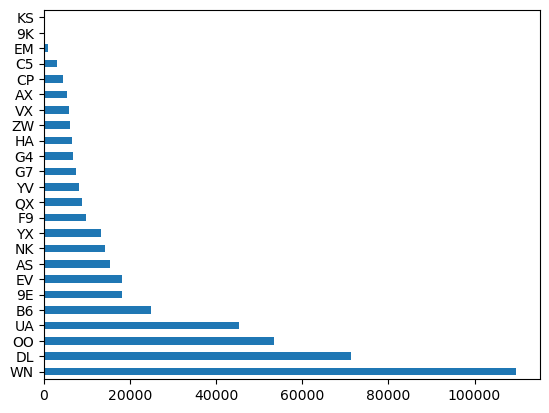

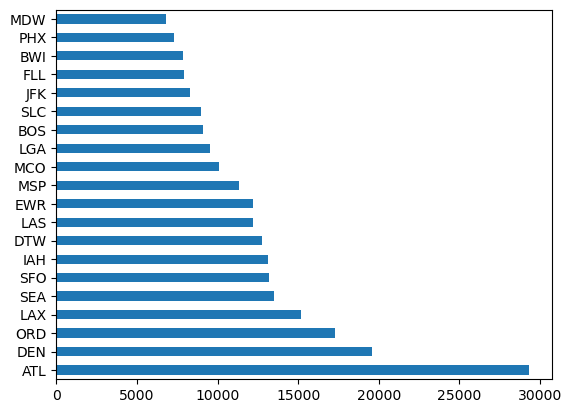

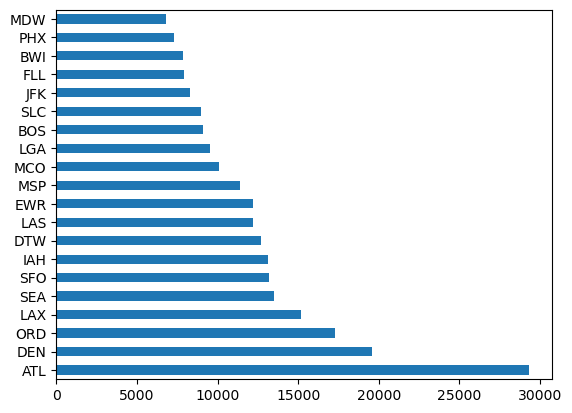

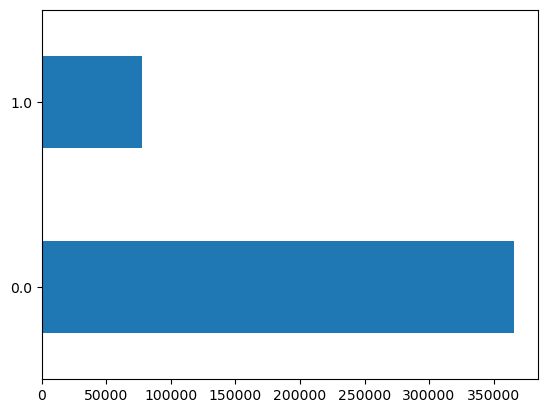

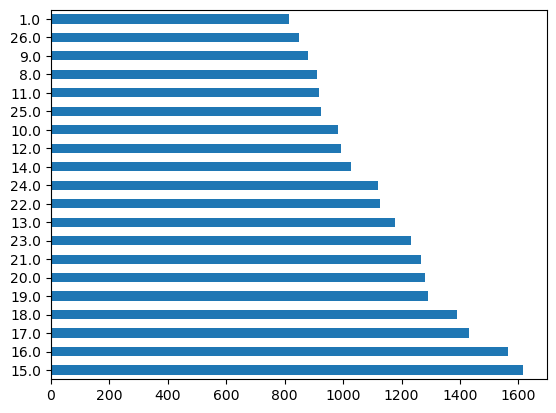

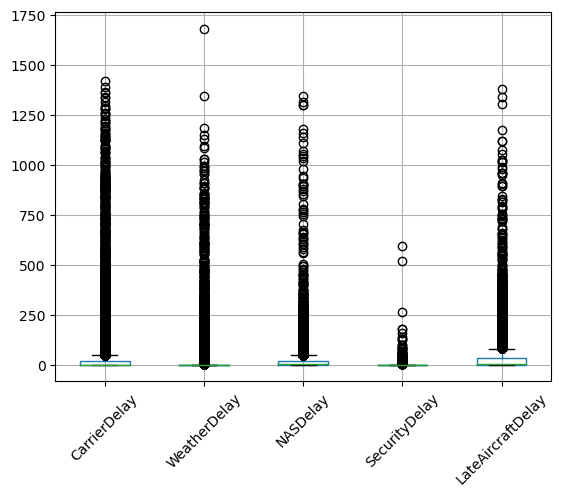

Mean Carrier Delay: 22.29105226588435
Mean Weather Delay: 5.047867207102876
Mean National Airspace Delay: 14.700186579167472
Mean Security Delay: 0.09851380042462846
Mean Late Aircraft Delay: 27.217628514443803
Median Carrier Delay: 0.0
Median Weather Delay: 0.0
Median National Airspace Delay: 1.0
Median Security Delay: 0.0
Median Late Aircraft Delay: 2.0


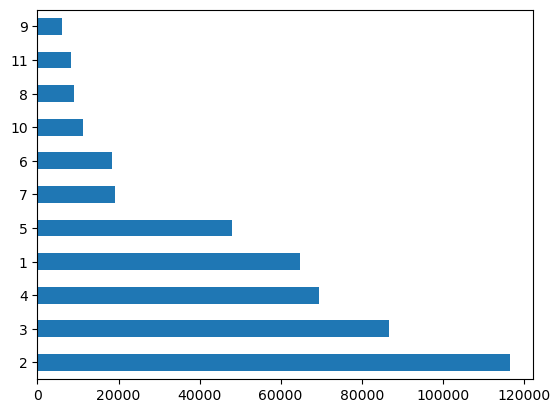

Percentage of flights delayed: 21.234252178260835


In [164]:
airlineAnalysis(test_frame)
originAnalysis(test_frame, 20)
destAnalysis(test_frame, 20)
delay15Analysis(test_frame)
delayPlots(test_frame)
boxplotData(test_frame)
delayCounts(test_frame)
DistanceAnalysis(test_frame, 20)
delayPercentage(test_frame)

In [169]:

def cyclicalEncodeDMY(df):
# cyclically encode year, month and day
    # sin_value = np.sin(2*np.pi*feature_value/feature_range)
    # cos_value = np.cos(2*np.pi*feature_value/feature_range)
    #Year, Month, DayofMonth,
    # if df['Month']== 1 | df['Month']== 3 | df['Month']== 5 | df['Month']== 7 | df['Month']== 8 | df['Month']== 10 | df['Month']== 12 :
    #     df['date_sin'] = np.sin(2*np.pi*df['DayofMonth']/31)
    #     df['date_cos'] = np.cos(2*np.pi*df['DayofMonth']/31)
    # elif df['Month']== 4 | df['Month']== 6 | df['Month']== 9 | df['Month']== 11:
    #     df['date_sin'] = np.sin(2*np.pi*df['DayofMonth']/30)
    #     df['date_cos'] = np.cos(2*np.pi*df['DayofMonth']/30)
    # elif df['Month']== 2 & df['Year']== 2020: 
    #     df['date_sin'] = np.sin(2*np.pi*df['DayofMonth']/29)
    #     df['date_cos'] = np.cos(2*np.pi*df['DayofMonth']/29)
    # else: 
    #     df['date_sin'] = np.sin(2*np.pi*df['DayofMonth']/28)
    #     df['date_cos'] = np.cos(2*np.pi*df['DayofMonth']/28)
    df['date_sin'] = np.sin(2*np.pi*df['DayofMonth']/31)
    df['date_cos'] = np.cos(2*np.pi*df['DayofMonth']/31)
    df['month_sin'] = np.sin(2*np.pi*df['Month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['Month']/12)
    df['year_sin'] = np.sin(2*np.pi*df['Year']/100)
    df['year_cos'] = np.cos(2*np.pi*df['Year']/100)
    # df.drop(['Date', 'month', 'year'], axis=1, inplace=True)
    return df



In [170]:
test_frame_encoded = cyclicalEncodeDMY(test_frame)

TypeError: cannot convert the series to <class 'int'>

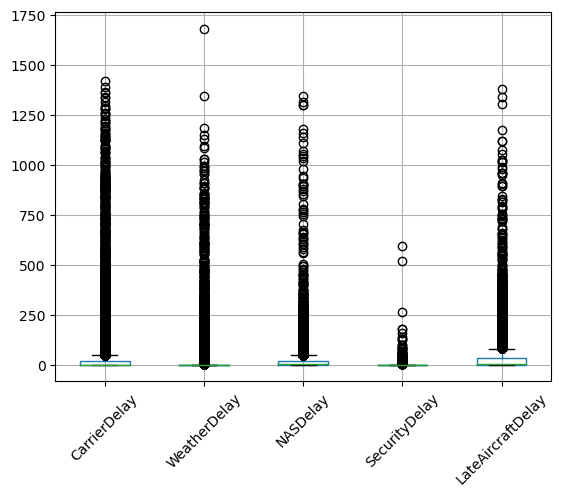

In [129]:
# one hot encode origin and destination